### EDA

Primero importo las librerias que voy a usar y cargo el dataset en la variable sample

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ruta_movies_sample = "../data/movies_sample.csv"
sample = pd.read_csv(ruta_movies_sample)

Ahora empiezo haciendo un chequeo de nulos

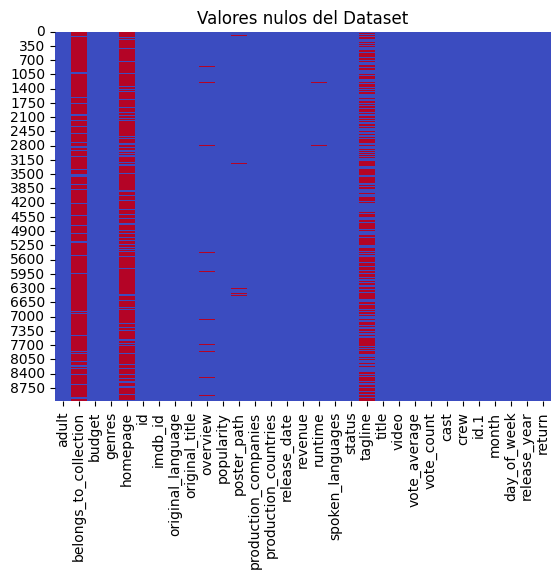

In [3]:
sns.heatmap(sample.isnull(),cbar= False, cmap='coolwarm')
plt.title('Valores nulos del Dataset')
plt.show()

Sigo por hacer un chequeo de valores duplicados

In [4]:
duplicados = sample.duplicated().sum()
print(f'Valores duplicados: {duplicados}')
#Al no tener valores duplicados no voy a hacer un grafico

Valores duplicados: 0


Ahora voy a ver si tenemos valores faltantes

belongs_to_collection    8164
homepage                 7512
imdb_id                     4
original_language           3
overview                  191
poster_path                69
runtime                    58
status                     19
tagline                  4996
dtype: int64


C:\Users\biott\AppData\Local\Temp\ipykernel_2812\209958727.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faltantes.index, y=faltantes.values, palette='inferno')


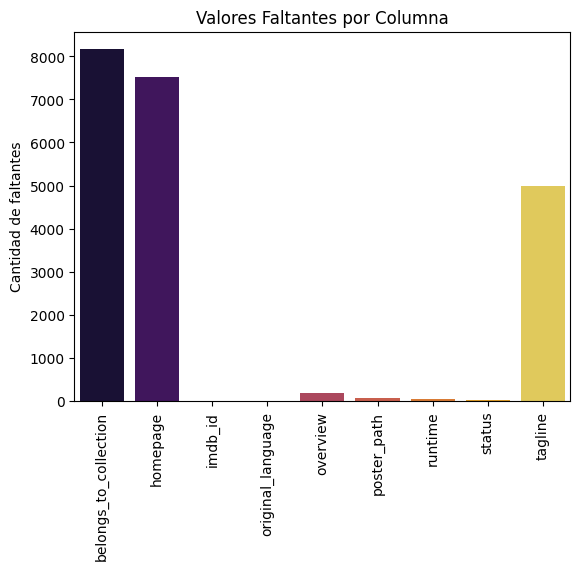

In [5]:
faltantes = sample.isnull().sum()
faltantes = faltantes[faltantes > 0]
print(faltantes)

# Al haber valores faltantes hago un grafico para ver que tanto afectan en las diferentes columnas
sns.barplot(x=faltantes.index, y=faltantes.values, palette='inferno')
plt.title('Valores Faltantes por Columna')
plt.ylabel('Cantidad de faltantes')
plt.xlabel('') #Agrego xlabel vacio porque sino aparece None
plt.xticks(rotation=90) #Rota los nombres en X para poder leerlos
plt.show()


Analizo los diferentes tipos de datos

adult                       bool
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
cast                      object
crew                      object
id.1                       int64
month                      int64
day_of_week                int64
release_year               int64
return    

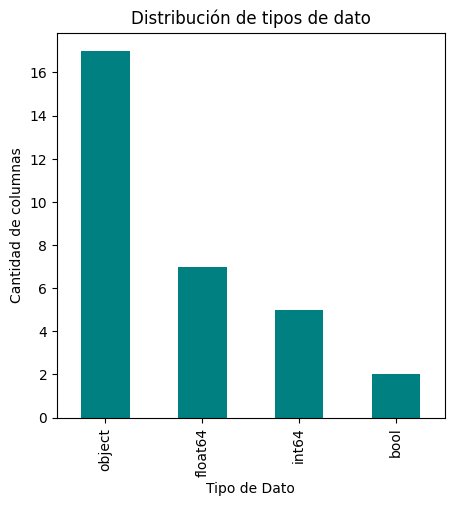

In [6]:
print(sample.dtypes)

plt.figure(figsize=(5, 5))
sample.dtypes.value_counts().plot(kind='bar', color='teal')
plt.title('Distribución de tipos de dato')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad de columnas')
plt.show()

Sigo por hacer un analisis estadistico

             budget             id   popularity       revenue      runtime  \
count  9.075000e+03    9075.000000  9075.000000  9.075000e+03  9017.000000   
mean   4.455428e+06  107779.477245     3.065087  1.248070e+07    94.483642   
std    1.825862e+07  113439.079303     8.089787  6.879716e+07    38.913106   
min    0.000000e+00      13.000000     0.000000  0.000000e+00     0.000000   
25%    0.000000e+00   25538.500000     0.402293  0.000000e+00    85.000000   
50%    0.000000e+00   58058.000000     1.142535  0.000000e+00    95.000000   
75%    0.000000e+00  155888.500000     3.846590  0.000000e+00   107.000000   
max    3.800000e+08  468343.000000   547.488298  1.405404e+09  1256.000000   

       vote_average    vote_count           id.1        month  day_of_week  \
count   9075.000000   9075.000000    9075.000000  9075.000000  9075.000000   
mean       5.636617    116.079008  108606.201653     6.394821     3.178182   
std        1.910439    494.366625  113226.037668     3.638357  

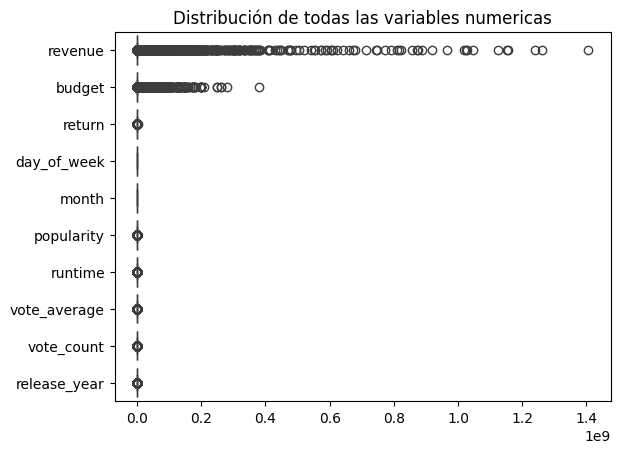

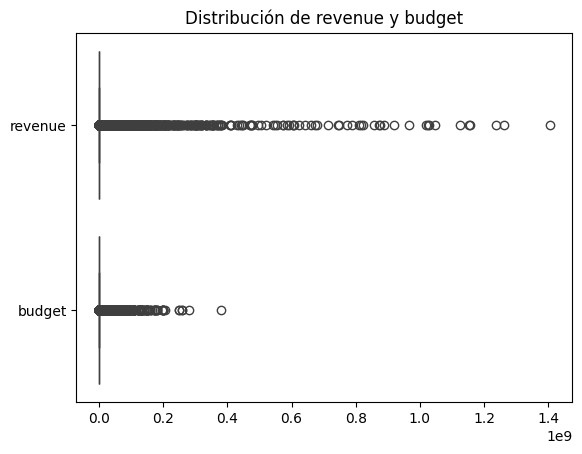

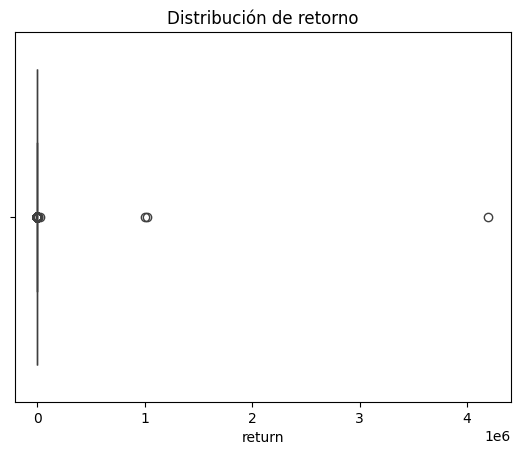

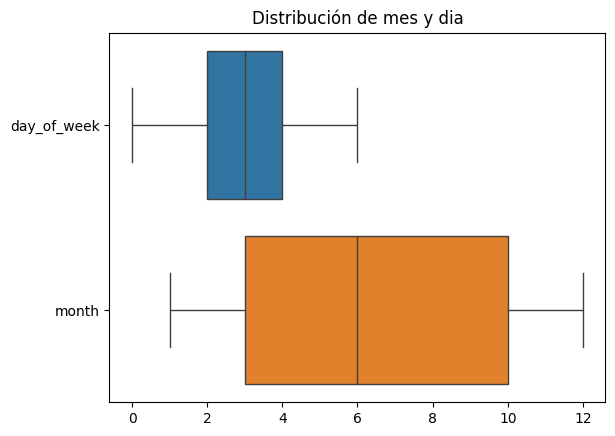

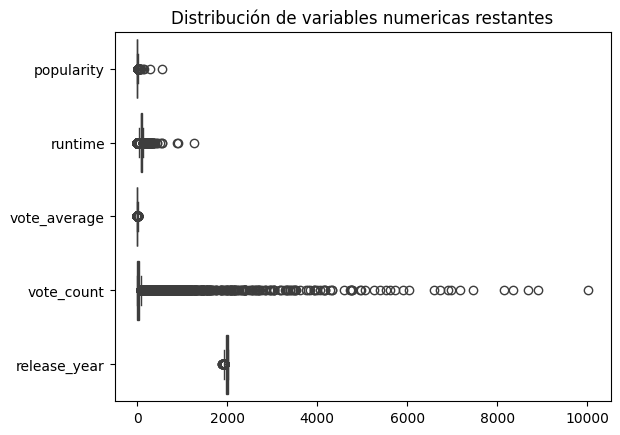

In [7]:
print(sample.describe())

sns.boxplot(data= sample[['revenue', 'budget','return','day_of_week', 'month','popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']], orient='h')
plt.title('Distribución de todas las variables numericas')
plt.show()

sns.boxplot(data= sample[['revenue', 'budget']], orient='h')
plt.title('Distribución de revenue y budget')
plt.show()

sns.boxplot(data= sample['return'], orient='h')
plt.title('Distribución de retorno')
plt.show()

sns.boxplot(data= sample[['day_of_week', 'month']], orient='h')
plt.title('Distribución de mes y dia')
plt.show()

sns.boxplot(data= sample[['popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']], orient='h')
plt.title('Distribución de variables numericas restantes')
plt.show()

Y por ultimo hago un analisis de correlaciones BI y multivariado

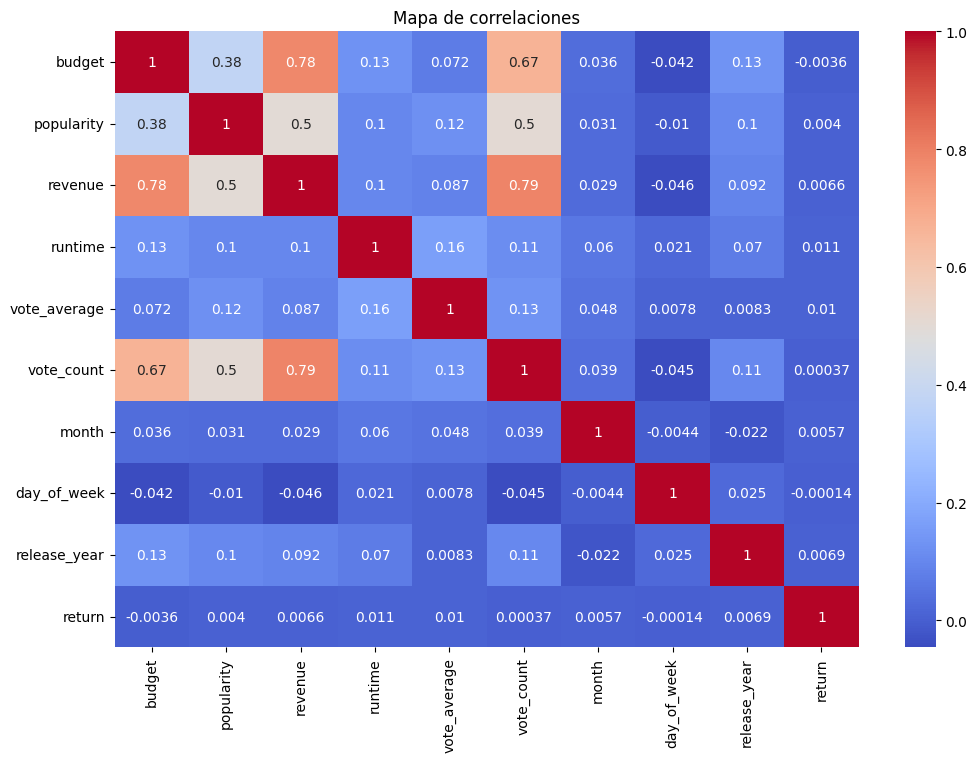

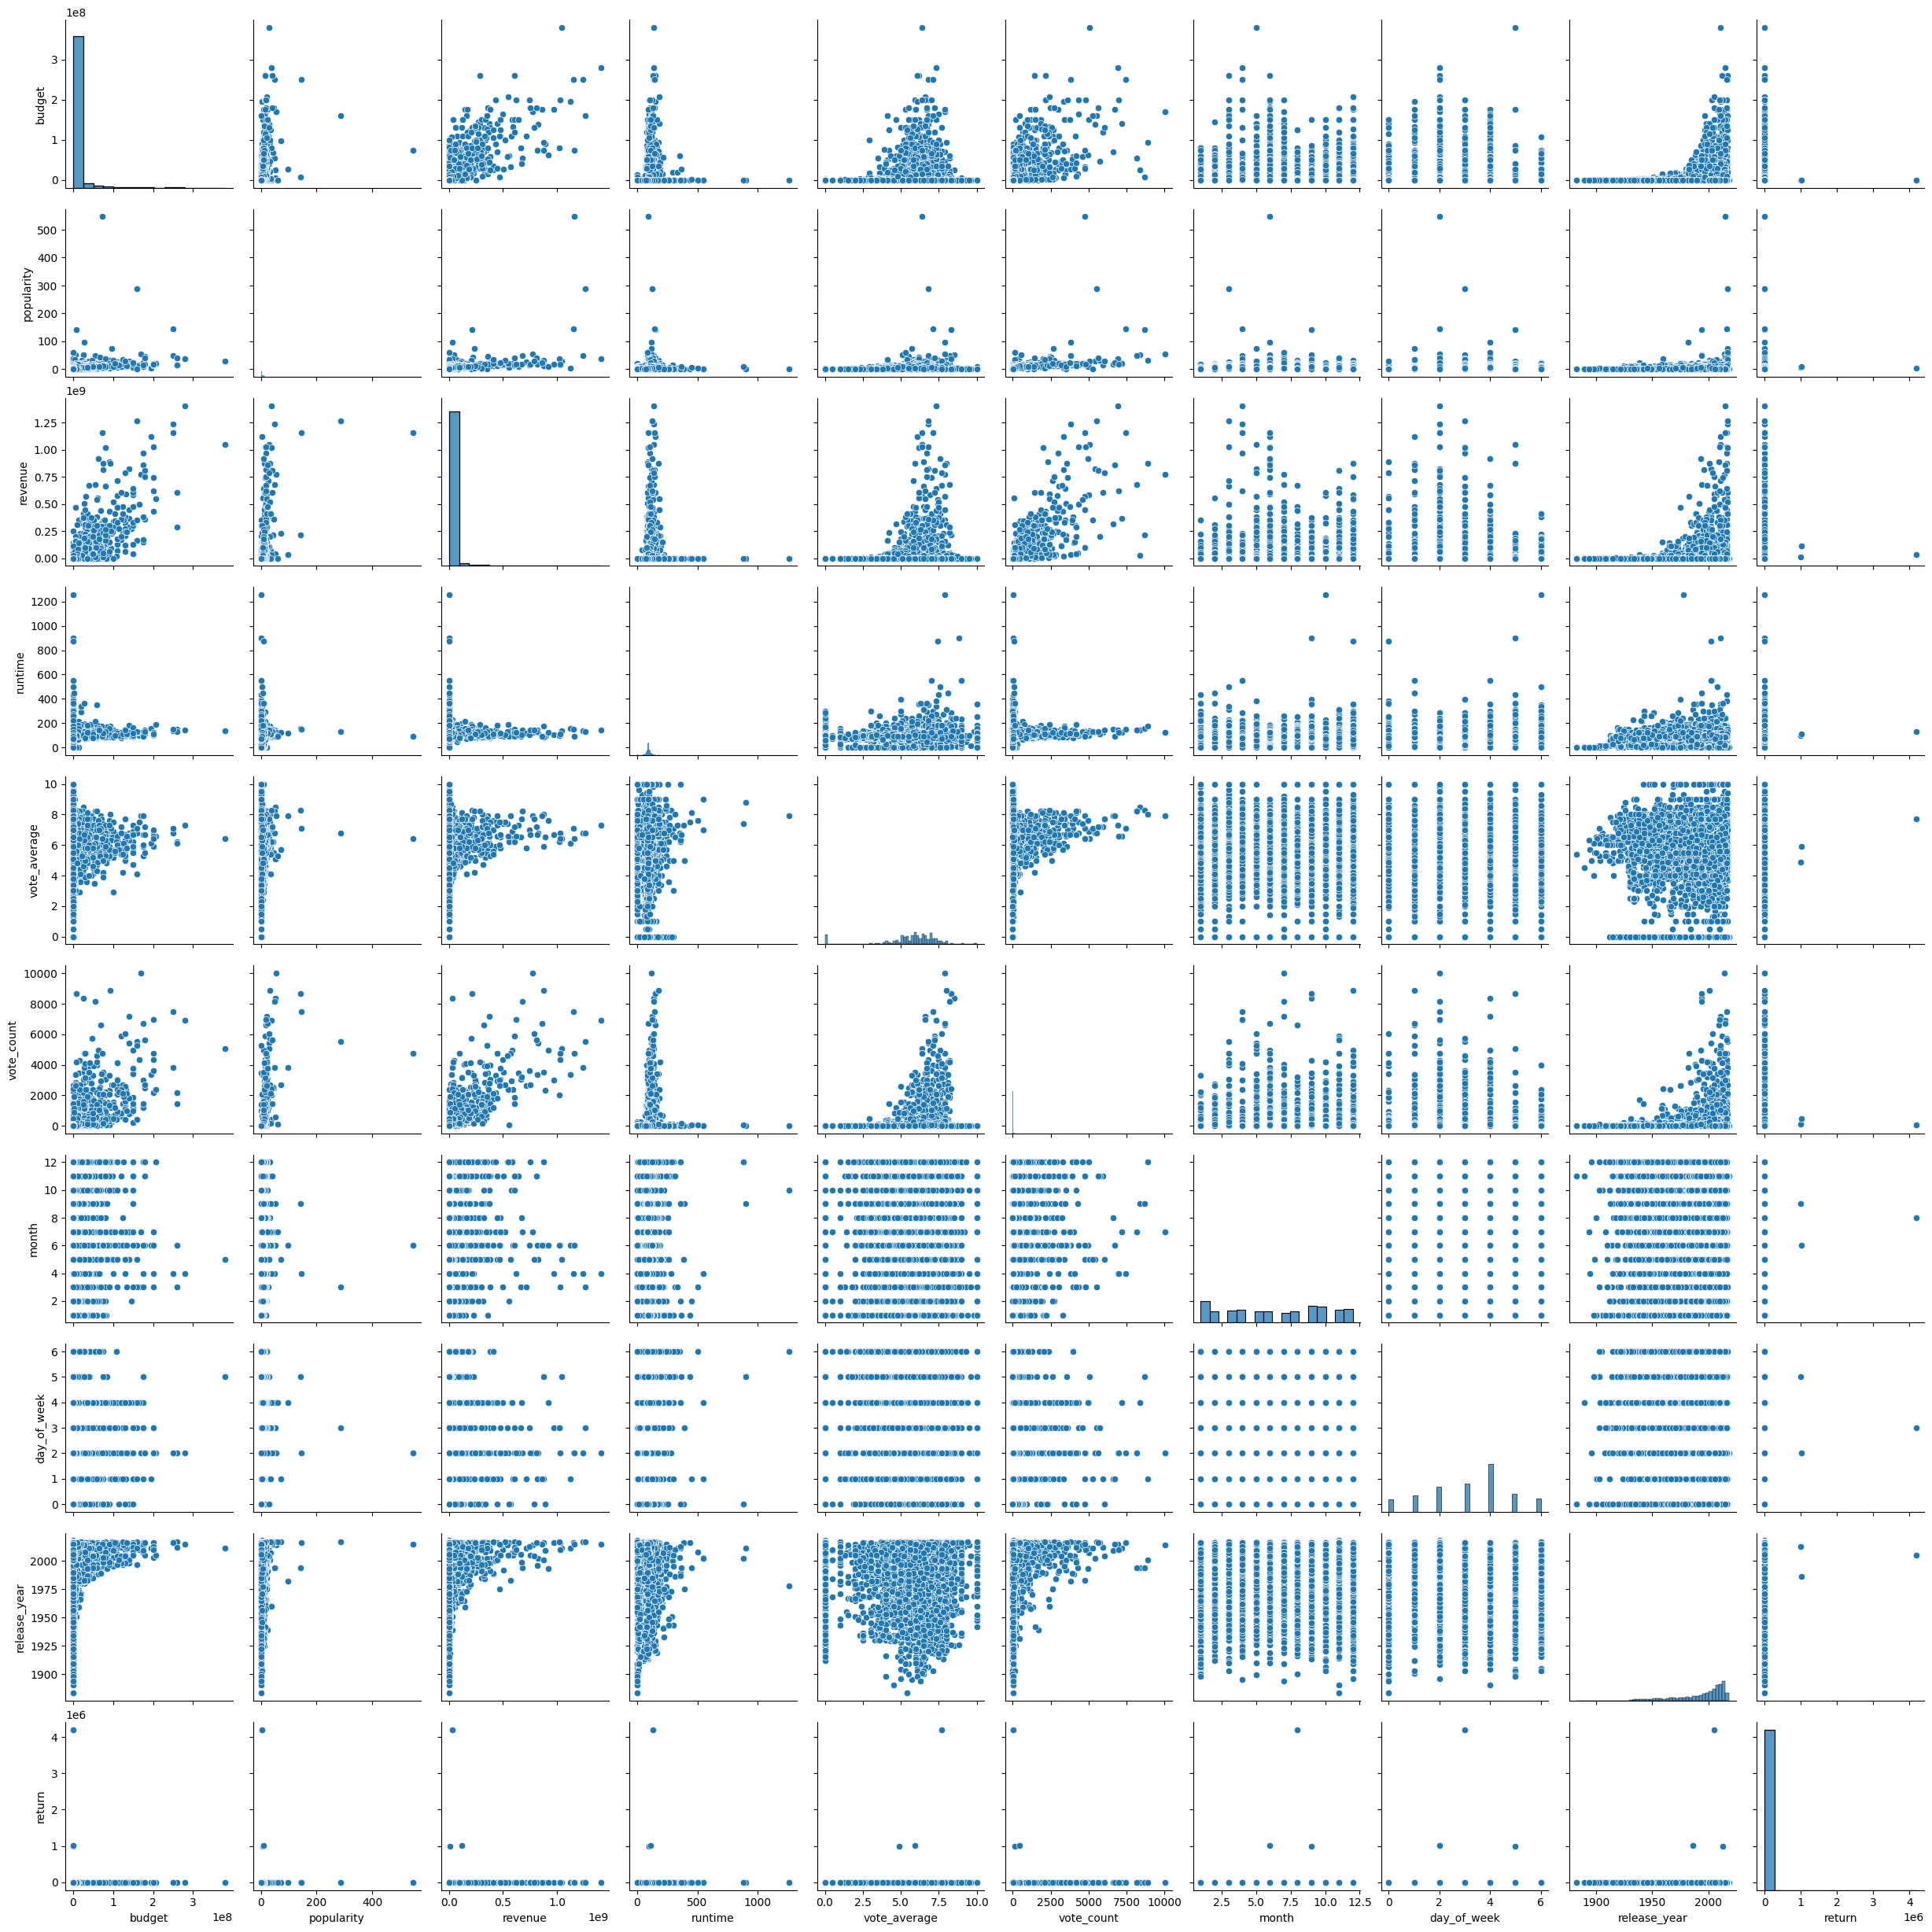

In [8]:
correlation_matrix = sample.drop(columns=['id','id.1']).select_dtypes(include='number').corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones')
plt.show()

sns.pairplot(sample.drop(columns=['id','id.1']).select_dtypes(include='number'))
plt.show()



Y ahora para finalizar el EDA voy a hacer una nube de plabras para saber cuales son las palabras mas usadas en los titulos de las peliculas

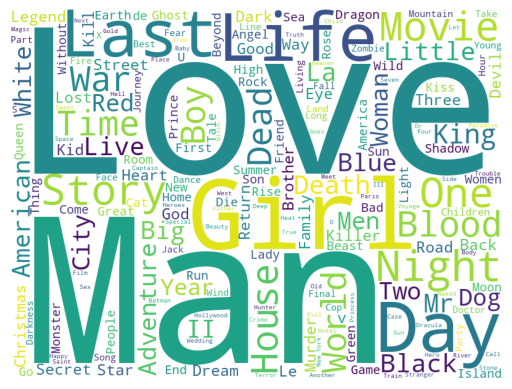

In [9]:
text = ' '.join(sample['title'])

wordcloud = WordCloud(width=800,height=600,background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()